Importing Necessary Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, f1_score

Loading The Dataset

In [215]:
dataset = pd.read_csv("..\dataset\creditcard.csv")

## Data Exploration

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(dataset.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [282]:
dataset.shape

(284807, 31)

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking Missing Value

In [9]:
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Data Analysis and Visualization

### Features Distribution

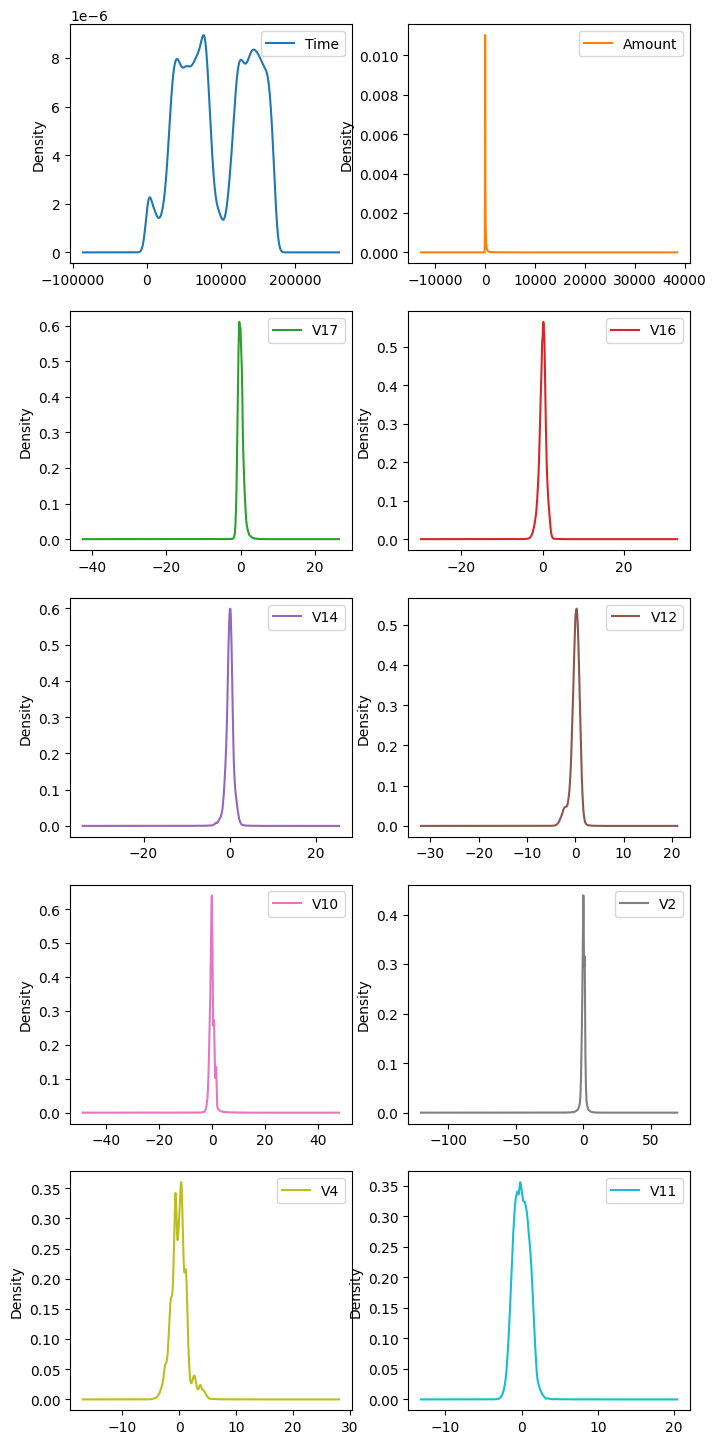

In [10]:
density_columns = ['Time', 'Amount', 'V17', 'V16', 'V14', 'V12', 'V10', 'V2', 'V4', 'V11']
dataset[density_columns].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(8, 18))
plt.show()

## Normalization

#### Scaled Feature ('Time', 'Amount')
- Since most of our data has already been scaled we should scale the columns that are left to scale (Time, Amount)
- We use RobustScaler, that is less prone to outliers.

In [216]:
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
robust_scaler = RobustScaler()

dataset['scaled_amount'] = robust_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = robust_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)
# dataset.drop(['Amount'], axis=1, inplace=True)

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


## Split Dataset to Train and Test

In [217]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X = dataset[ind_col]
y = dataset[dep_col]

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

## Class Distributions

Ckecking Class Distributions

In [107]:
print('No Frauds : ', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '%')
print('Frauds : ', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '%')

No Frauds :  99.83 %
Frauds :  0.17 %


C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\1431780042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class", data=dataset, palette="Set1")


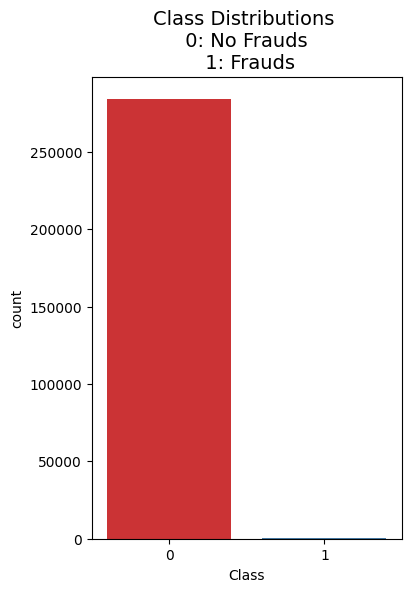

In [108]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset, palette="Set1")
plt.title('Class Distributions \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

#### Correlation Heatmap

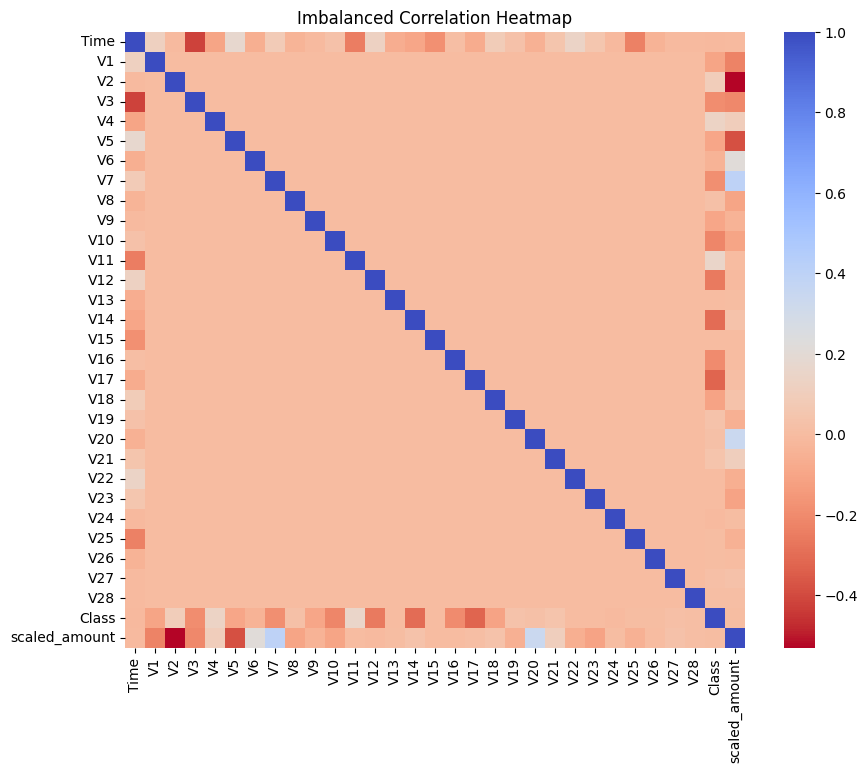

In [109]:
plt.figure(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Imbalanced Correlation Heatmap')
plt.show()

## Address the unbalanced data issue by trying Oversampling (SMOTE Method)

In [175]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 4)
X_os, y_os = sm.fit_resample(X_train, y_train)

X_os.shape

(454902, 30)

In [176]:
dataset_Oversampling_train = pd.concat([X_os, y_os], axis=1)

Ckecking Class Distributions

In [ ]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset_Oversampling_train, palette="Set1")
plt.title('Class Distributions (Oversampling) \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

#### Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
corr = dataset_Oversampling_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Oversampling Correlation Heatmap')
plt.show()

## Address the unbalanced data issue by trying Undersampling

In [219]:
temp = pd.concat([X_train, y_train], axis=1)

class_counts = temp['Class'].value_counts()

print(class_counts)

Class
0    227451
1       394
Name: count, dtype: int64


In [220]:
# Find the minority and majority class labels
minority_class_label = class_counts.idxmin()
majority_class_label = class_counts.idxmax()

print('Minority_class_label = ',minority_class_label, '\nMajority_class_label = ',majority_class_label)

Minority_class_label =  1 
Majority_class_label =  0


In [221]:
# Count the number of records in the minority class
minority_class_count = class_counts[minority_class_label]
print(minority_class_count)

394


In [222]:
indices_to_drop = temp[temp['Class'] == majority_class_label].sample(n=(class_counts[majority_class_label] - minority_class_count), random_state=42).index

# Drop the sampled indices from the DataFrame
dataset_Undersampling_train = temp.drop(indices_to_drop)

dataset_Undersampling_train.shape

(788, 31)

Ckecking Class Distributions

C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\2466690445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class", data=dataset_Undersampling_train, palette="Set1")


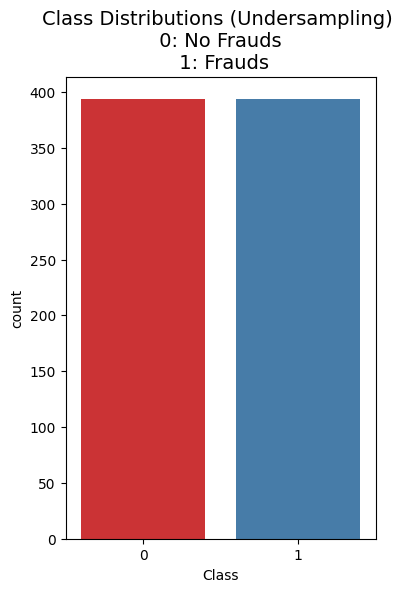

In [223]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset_Undersampling_train, palette="Set1")
plt.title('Class Distributions (Undersampling) \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

Correlation Heatmap

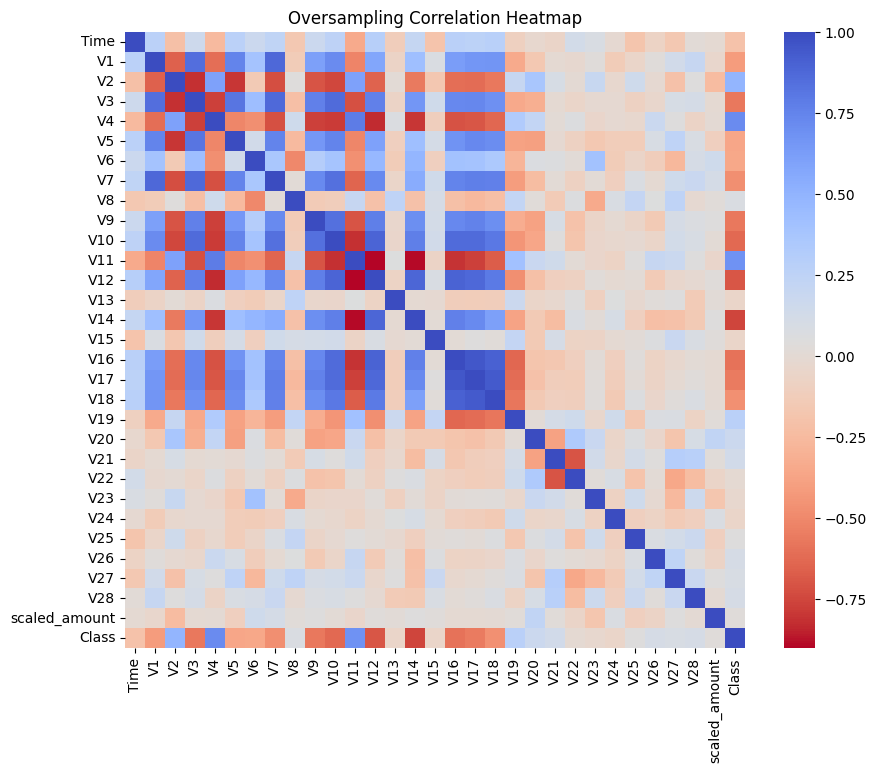

In [224]:
plt.figure(figsize=(10, 8))
corr = dataset_Undersampling_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Oversampling Correlation Heatmap')
plt.show()

## Analyze Most Important Negative Correlations (Fraud Transaction):

C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\1723969428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\1723969428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\1723969428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
C:\Users\F

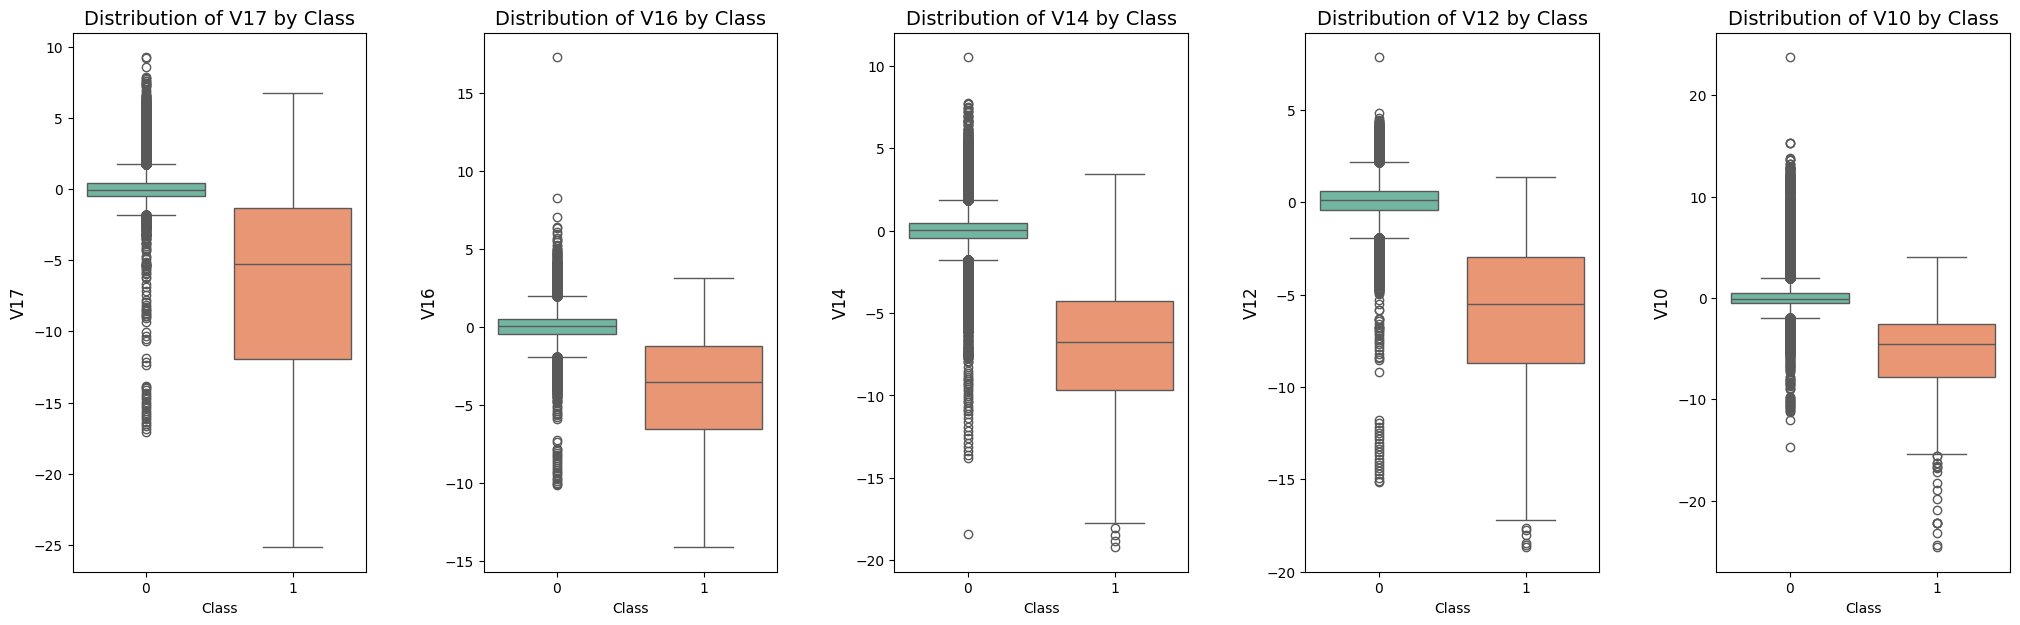

In [110]:
corr_columns = ['V17', 'V16', 'V14', 'V12', 'V10']

fig, axes = plt.subplots(1, 5, figsize=(25, 7))

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Class', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

### Remove Extreme Outliers of Features (V14, V12, V10) for Fraud Cases

#### From Orginal Dataset:

In [111]:
dataset_Unbalanced_train = pd.concat([X_train, y_train], axis=1)

In [112]:
# We get all values of feature 'V14' where 'Class' equal to 1
v14_fraud = dataset_Unbalanced_train['V14'].loc[dataset_Unbalanced_train['Class'] == 1].values
q25 = np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
print('Feature V14: \niqr: {}'.format(v14_iqr))

v14_threshold = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_threshold, q75 + v14_threshold
print('Threshold: {}'.format(v14_threshold))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Unbalanced_train = dataset_Unbalanced_train.drop(dataset_Unbalanced_train[(dataset_Unbalanced_train['V14'] > v14_upper) | (dataset_Unbalanced_train['V14'] < v14_lower)].index)

Feature V14: 
iqr: 5.630894061347163
Threshold: 8.446341092020745
V14 Lower: -18.350020649139726
V14 Upper: 4.173555596248928
Feature V14 Outliers for Fraud Cases: 2


In [113]:
# We get all values of feature 'V12' where 'Class' equal to 1
v12_fraud = dataset_Unbalanced_train['V12'].loc[dataset_Unbalanced_train['Class'] == 1].values
q25 = np.percentile(v12_fraud, 25)
q75 = np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print('Feature V12: \niqr: {}'.format(v12_iqr))

v12_threshold = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_threshold, q75 + v12_threshold
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Unbalanced_train = dataset_Unbalanced_train.drop(dataset_Unbalanced_train[(dataset_Unbalanced_train['V12'] > v12_upper) | (dataset_Unbalanced_train['V12'] < v12_lower)].index)

Feature V12: 
iqr: 5.686459678795296
V12 Lower: -17.217866040005248
V12 Upper: 5.527972675175934
Feature V12 Outliers for Fraud Cases: 3


In [114]:
# We get all values of feature 'V12' where 'Class' equal to 1
v10_fraud = dataset_Unbalanced_train['V10'].loc[dataset_Unbalanced_train['Class'] == 1].values
q25 = np.percentile(v10_fraud, 25)
q75 = np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
print('Feature V10: \niqr: {}'.format(v10_iqr))

v10_threshold = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_threshold, q75 + v10_threshold
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Unbalanced_train = dataset_Unbalanced_train.drop(dataset_Unbalanced_train[(dataset_Unbalanced_train['V10'] > v10_upper) | (dataset_Unbalanced_train['V10'] < v10_lower)].index)

Feature V10: 
iqr: 5.00649294545512
V10 Lower: -15.01185160911954
V10 Upper: 5.01412017270094
Feature V10 Outliers for Fraud Cases: 18


#### From Oversampling Dataset:

In [177]:
# We get all values of feature 'V14' where 'Class' equal to 1
v14_fraud = dataset_Oversampling_train['V14'].loc[dataset_Oversampling_train['Class'] == 1].values
q25 = np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
print('Feature V14: \niqr: {}'.format(v14_iqr))

v14_threshold = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_threshold, q75 + v14_threshold
print('Threshold: {}'.format(v14_threshold))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling_train = dataset_Oversampling_train.drop(dataset_Oversampling_train[(dataset_Oversampling_train['V14'] > v14_upper) | (dataset_Oversampling_train['V14'] < v14_lower)].index)

Feature V14: 
iqr: 5.080347001326619
Threshold: 7.62052050198993
V14 Lower: -17.2155248437374
V14 Upper: 3.10586316156908
Feature V14 Outliers for Fraud Cases: 1186


In [178]:
# We get all values of feature 'V12' where 'Class' equal to 1
v12_fraud = dataset_Oversampling_train['V12'].loc[dataset_Oversampling_train['Class'] == 1].values
q25 = np.percentile(v12_fraud, 25)
q75 = np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print('Feature V12: \niqr: {}'.format(v12_iqr))

v12_threshold = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_threshold, q75 + v12_threshold
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling_train = dataset_Oversampling_train.drop(dataset_Oversampling_train[(dataset_Oversampling_train['V12'] > v12_upper) | (dataset_Oversampling_train['V12'] < v12_lower)].index)

Feature V12: 
iqr: 5.492105080485499
V12 Lower: -16.92529316712033
V12 Upper: 5.043127154821668
Feature V12 Outliers for Fraud Cases: 3139


In [179]:
# We get all values of feature 'V12' where 'Class' equal to 1
v10_fraud = dataset_Oversampling_train['V10'].loc[dataset_Oversampling_train['Class'] == 1].values
q25 = np.percentile(v10_fraud, 25)
q75 = np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
print('Feature V10: \niqr: {}'.format(v10_iqr))

v10_threshold = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_threshold, q75 + v10_threshold
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling_train = dataset_Oversampling_train.drop(dataset_Oversampling_train[(dataset_Oversampling_train['V10'] > v10_upper) | (dataset_Oversampling_train['V10'] < v10_lower)].index)

Feature V10: 
iqr: 4.597780769348622
V10 Lower: -14.23692506348673
V10 Upper: 4.15419801390776
Feature V10 Outliers for Fraud Cases: 10942


#### From Undersampling Dataset:

In [225]:
# We get all values of feature 'V14' where 'Class' equal to 1
v14_fraud = dataset_Undersampling_train['V14'].loc[dataset_Undersampling_train['Class'] == 1].values
q25 = np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
print('Feature V14: \niqr: {}'.format(v14_iqr))

v14_threshold = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_threshold, q75 + v14_threshold
print('Threshold: {}'.format(v14_threshold))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Undersampling_train = dataset_Undersampling_train.drop(dataset_Undersampling_train[(dataset_Undersampling_train['V14'] > v14_upper) | (dataset_Undersampling_train['V14'] < v14_lower)].index)

Feature V14: 
iqr: 5.630894061347163
Threshold: 8.446341092020745
V14 Lower: -18.350020649139726
V14 Upper: 4.173555596248928
Feature V14 Outliers for Fraud Cases: 2


In [226]:
# We get all values of feature 'V12' where 'Class' equal to 1
v12_fraud = dataset_Undersampling_train['V12'].loc[dataset_Undersampling_train['Class'] == 1].values
q25 = np.percentile(v12_fraud, 25)
q75 = np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print('Feature V12: \niqr: {}'.format(v12_iqr))

v12_threshold = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_threshold, q75 + v12_threshold
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Undersampling_train = dataset_Undersampling_train.drop(dataset_Undersampling_train[(dataset_Undersampling_train['V12'] > v12_upper) | (dataset_Undersampling_train['V12'] < v12_lower)].index)

Feature V12: 
iqr: 5.686459678795296
V12 Lower: -17.217866040005248
V12 Upper: 5.527972675175934
Feature V12 Outliers for Fraud Cases: 3


In [227]:
# We get all values of feature 'V10' where 'Class' equal to 1
v10_fraud = dataset_Undersampling_train['V10'].loc[dataset_Undersampling_train['Class'] == 1].values
q25 = np.percentile(v10_fraud, 25)
q75 = np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
print('Feature V10: \niqr: {}'.format(v10_iqr))

v10_threshold = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_threshold, q75 + v10_threshold
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Undersampling_train = dataset_Undersampling_train.drop(dataset_Undersampling_train[(dataset_Undersampling_train['V10'] > v10_upper) | (dataset_Undersampling_train['V10'] < v10_lower)].index)

Feature V10: 
iqr: 5.00649294545512
V10 Lower: -15.01185160911954
V10 Upper: 5.01412017270094
Feature V10 Outliers for Fraud Cases: 18


## Analyze Most Important Positive Correlations (Fraud Transaction):

C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\3797163162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\3797163162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_20736\3797163162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')


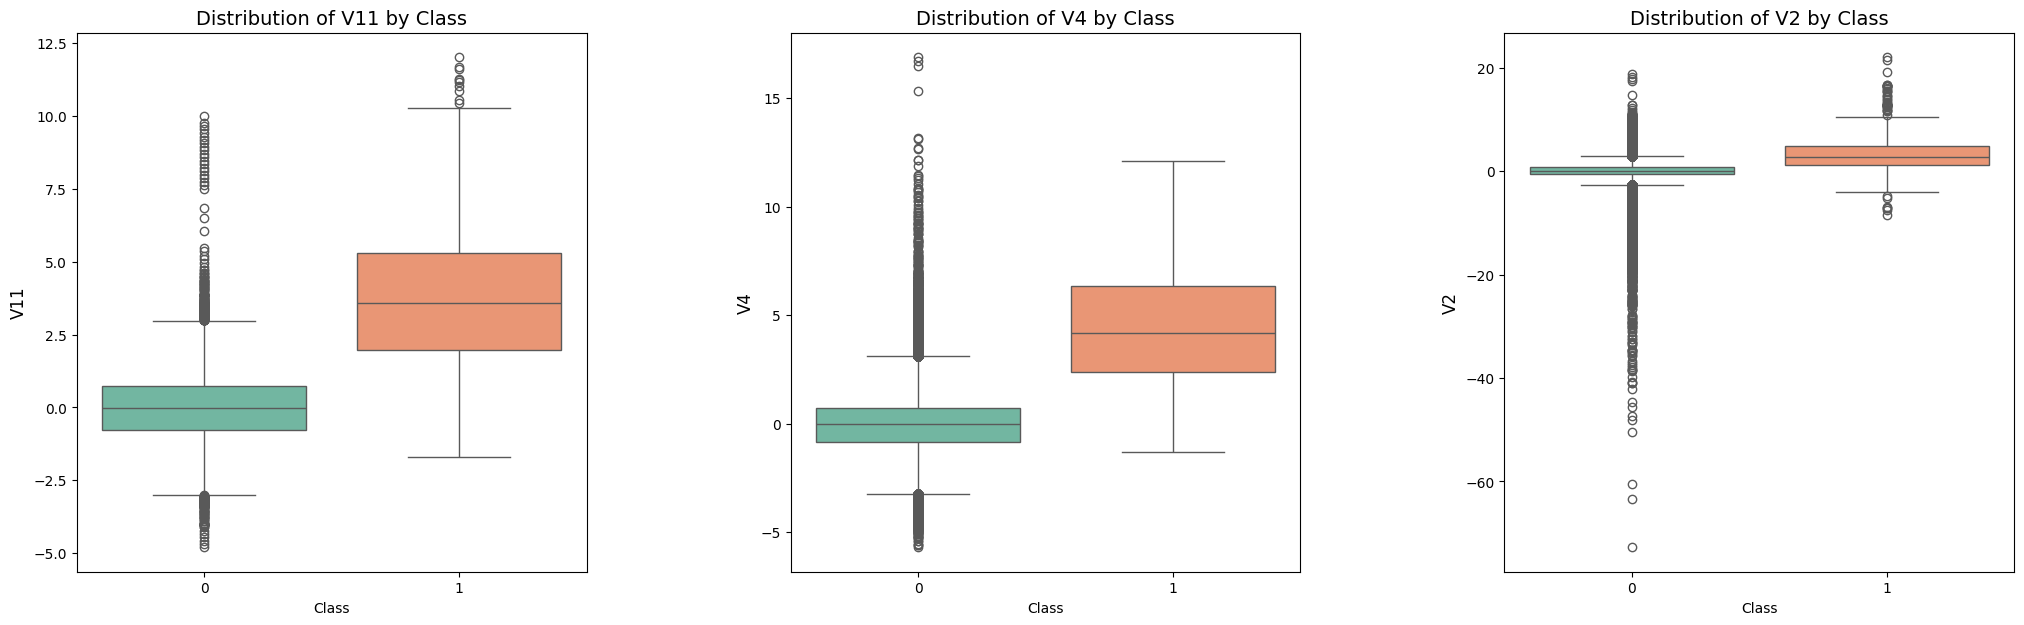

In [115]:
corr_columns = ['V11', 'V4', 'V2']

fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='Class', y=num_col, data=dataset, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Class', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

### Remove Extreme Outliers of Features (V11, V2) for Fraud Cases

#### From Orginal Dataset

In [116]:
# We get all values of feature 'V11' where 'Class' equal to 1
v11_fraud = dataset_Unbalanced_train['V11'].loc[dataset_Unbalanced_train['Class'] == 1].values
q25 = np.percentile(v11_fraud, 25)
q75 = np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
print('Feature V11: \niqr: {}'.format(v11_iqr))

v11_threshold = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_threshold, q75 + v11_threshold
print('Threshold: {}'.format(v11_threshold))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Unbalanced_train = dataset_Unbalanced_train.drop(dataset_Unbalanced_train[(dataset_Unbalanced_train['V11'] > v11_upper) | (dataset_Unbalanced_train['V11'] < v11_lower)].index)

Feature V11: 
iqr: 3.3311869879084397
Threshold: 4.996780481862659
V11 Lower: -3.0874116628593042
V11 Upper: 10.237336288774454
Feature V11 Outliers for Fraud Cases: 7


In [117]:
# We get all values of feature 'V2' where 'Class' equal to 1
v2_fraud = dataset_Unbalanced_train['V2'].loc[dataset_Unbalanced_train['Class'] == 1].values
q25 = np.percentile(v2_fraud, 25)
q75 = np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
print('Feature V2: \niqr: {}'.format(v2_iqr))

v2_threshold = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_threshold, q75 + v2_threshold
print('Threshold: {}'.format(v2_threshold))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Unbalanced_train = dataset_Unbalanced_train.drop(dataset_Unbalanced_train[(dataset_Unbalanced_train['V2'] > v2_upper) | (dataset_Unbalanced_train['V2'] < v2_lower)].index)

Feature V2: 
iqr: 2.997317148844532
Threshold: 4.495975723266798
V2 Lower: -3.3594857405188128
V2 Upper: 8.629782854859315
Feature V2 Outliers for Fraud Cases: 32


##### Remove 'Class' Variable

In [118]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X_train = dataset_Unbalanced_train[ind_col]
y_train = dataset_Unbalanced_train[dep_col]

#### From Oversampling Dataset

In [180]:
# We get all values of feature 'V11' where 'Class' equal to 1
v11_fraud = dataset_Oversampling_train['V11'].loc[dataset_Oversampling_train['Class'] == 1].values
q25 = np.percentile(v11_fraud, 25)
q75 = np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
print('Feature V11: \niqr: {}'.format(v11_iqr))

v11_threshold = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_threshold, q75 + v11_threshold
print('Threshold: {}'.format(v11_threshold))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling_train = dataset_Oversampling_train.drop(dataset_Oversampling_train[(dataset_Oversampling_train['V11'] > v11_upper) | (dataset_Oversampling_train['V11'] < v11_lower)].index)

Feature V11: 
iqr: 3.1660940636992585
Threshold: 4.749141095548888
V11 Lower: -2.7614564854476997
V11 Upper: 9.902919769349335
Feature V11 Outliers for Fraud Cases: 3301


In [181]:
# We get all values of feature 'V2' where 'Class' equal to 1
v2_fraud = dataset_Oversampling_train['V2'].loc[dataset_Oversampling_train['Class'] == 1].values
q25 = np.percentile(v2_fraud, 25)
q75 = np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
print('Feature V2: \niqr: {}'.format(v2_iqr))

v2_threshold = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_threshold, q75 + v2_threshold
print('Threshold: {}'.format(v2_threshold))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Oversampling_train = dataset_Oversampling_train.drop(dataset_Oversampling_train[(dataset_Oversampling_train['V2'] > v2_upper) | (dataset_Oversampling_train['V2'] < v2_lower)].index)

Feature V2: 
iqr: 2.7892531205136795
Threshold: 4.183879680770519
V2 Lower: -2.8665239962693256
V2 Upper: 8.290488485785392
Feature V2 Outliers for Fraud Cases: 18542


##### Remove 'Class' Variable

In [182]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X_os_train = dataset_Oversampling_train[ind_col]
y_os_train = dataset_Oversampling_train[dep_col]

#### From Oversampling Dataset:

In [228]:
# We get all values of feature 'V11' where 'Class' equal to 1
v11_fraud = dataset_Undersampling_train['V11'].loc[dataset_Undersampling_train['Class'] == 1].values
q25 = np.percentile(v11_fraud, 25)
q75 = np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
print('Feature V11: \niqr: {}'.format(v11_iqr))

v11_threshold = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_threshold, q75 + v11_threshold
print('Threshold: {}'.format(v11_threshold))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Undersampling_train = dataset_Undersampling_train.drop(dataset_Undersampling_train[(dataset_Undersampling_train['V11'] > v11_upper) | (dataset_Undersampling_train['V11'] < v11_lower)].index)

Feature V11: 
iqr: 3.3311869879084397
Threshold: 4.996780481862659
V11 Lower: -3.0874116628593042
V11 Upper: 10.237336288774454
Feature V11 Outliers for Fraud Cases: 7


In [229]:
# We get all values of feature 'V2' where 'Class' equal to 1
v2_fraud = dataset_Undersampling_train['V2'].loc[dataset_Undersampling_train['Class'] == 1].values
q25 = np.percentile(v2_fraud, 25)
q75 = np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
print('Feature V2: \niqr: {}'.format(v2_iqr))

v2_threshold = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_threshold, q75 + v2_threshold
print('Threshold: {}'.format(v2_threshold))
print('V2 Lower: {}'.format(v2_lower))
print('V2 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))

dataset_Undersampling_train = dataset_Undersampling_train.drop(dataset_Undersampling_train[(dataset_Undersampling_train['V2'] > v2_upper) | (dataset_Undersampling_train['V2'] < v2_lower)].index)

Feature V2: 
iqr: 2.997317148844532
Threshold: 4.495975723266798
V2 Lower: -3.3594857405188128
V2 Upper: 8.629782854859315
Feature V2 Outliers for Fraud Cases: 32


##### Remove 'Class' Variable

In [230]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X_us_train = dataset_Undersampling_train[ind_col]
y_us_train = dataset_Undersampling_train[dep_col]

# Classifier Models (Unbalanced Dataset)

## Decision Tree

#### Decision Tree without Pruning

In [120]:
model = DecisionTreeClassifier(random_state=10)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

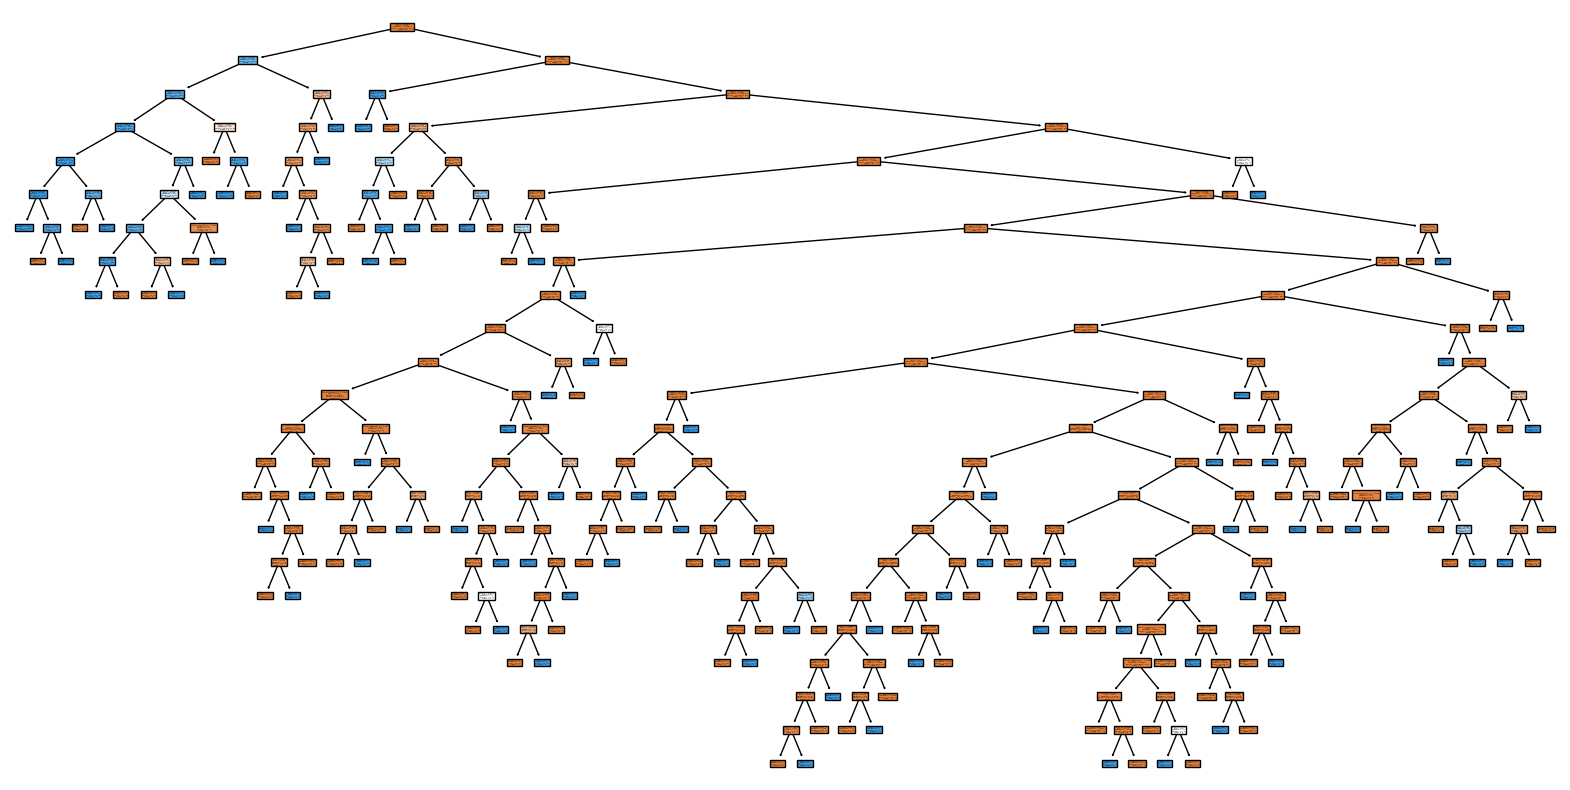

In [121]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_train), class_names= list(y_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [122]:
train_score = cross_val_score(model, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9992742229591656
Accuracy: 0.9985428882412837


In [123]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.6556016597510373
Recall Score: 0.81
Precision Score: 0.55


Confusion Matrix

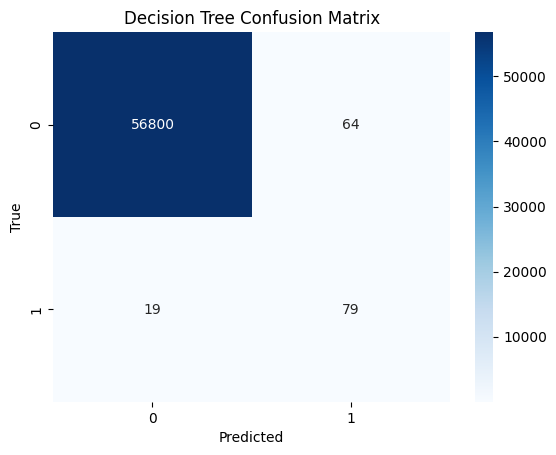

In [124]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### Decision Tree with Pruning
Hyperparameter Tuning using GridSearchCV

In [125]:
# Performing a grid search to find the best hyperparameters using the "GridSearchCV"
parameters = {
    'max_depth': range(1,5),
    'max_features': range(5,12),
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    cv=3,
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 9}


Fit Model with pruning

In [126]:
model = DecisionTreeClassifier(max_depth=4,max_features=9, random_state=10, splitter ='best')

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=9, random_state=10)

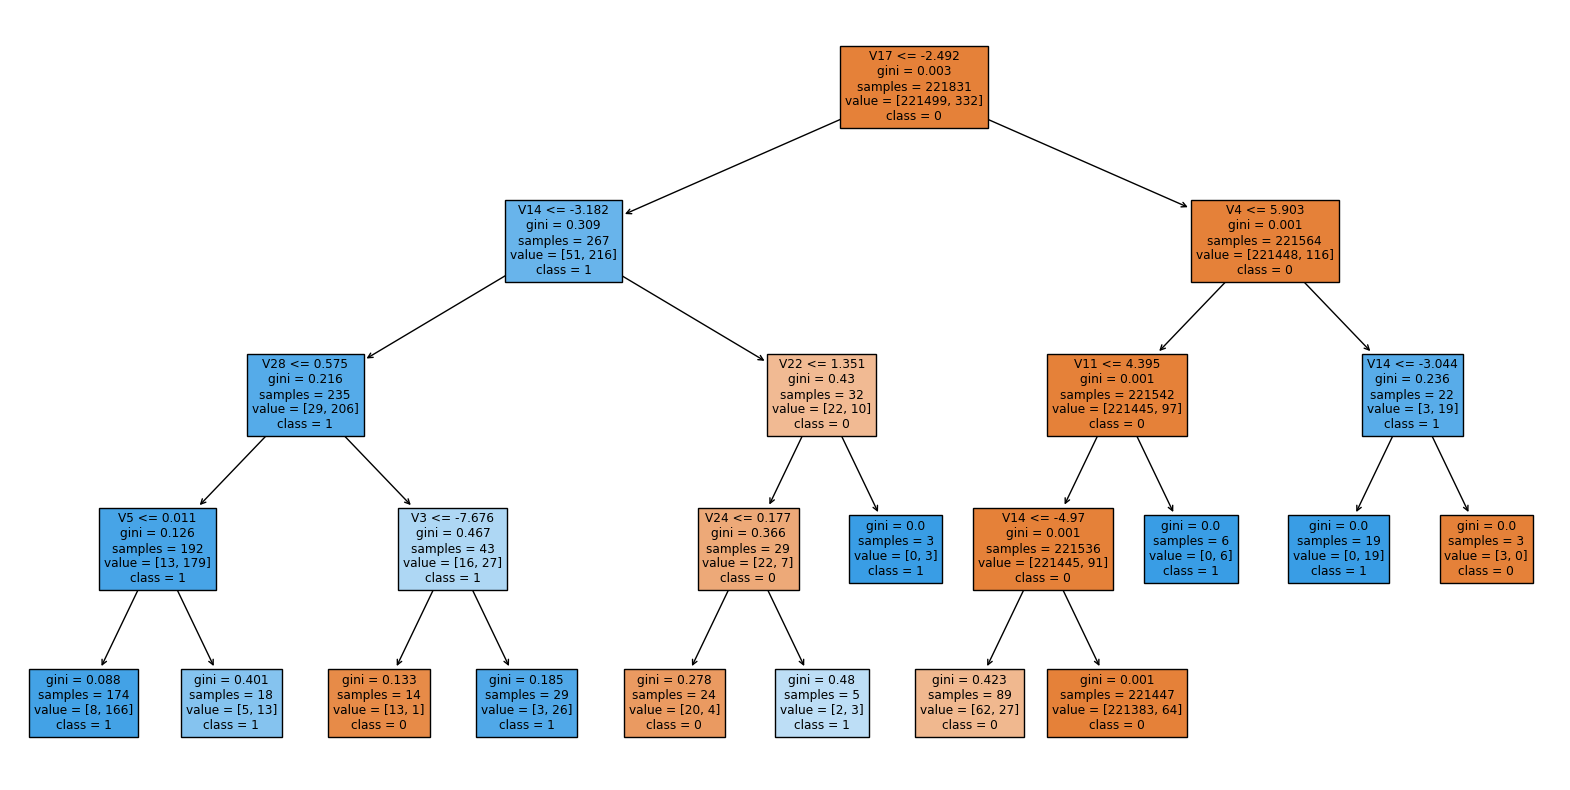

In [127]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_train), class_names= list(y_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [128]:
train_score = cross_val_score(model, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.999427492363971
Accuracy: 0.9989291106351603


In [129]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.680628272251309
Recall Score: 0.66
Precision Score: 0.70


Confusion Matrix

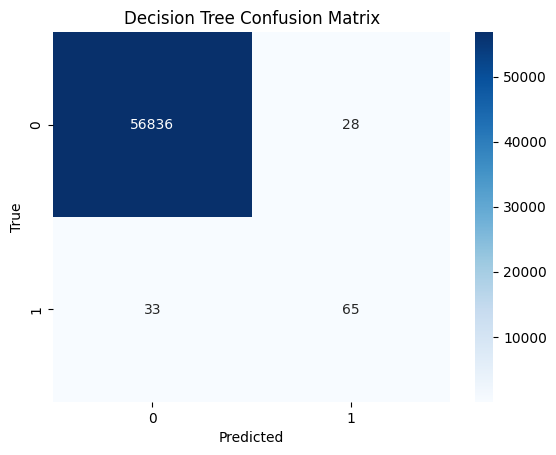

In [130]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## XGBoost

#### Normal XGBoost

In [131]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [132]:
train_score = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9995987934933435
Accuracy: 0.9996137776061234


In [133]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.8764044943820225
Recall Score: 0.80
Precision Score: 0.97


Confusion Matrix

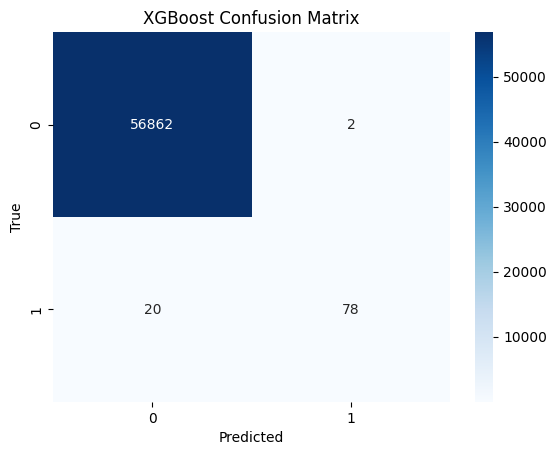

In [134]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

#### XGBoost using GridSearch
Hyperparameter Tuning using GridSearchCV

In [135]:
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(xgb_clf, param_grid=parameters, cv=4)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


Fit the Model

In [136]:
xgb_clf_best = xgb.XGBClassifier(max_depth=3 , learning_rate=0.1 ,n_estimators=300)

xgb_clf_best.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [138]:
train_score = cross_val_score(xgb_clf_best, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9995987935949495
Accuracy: 0.9995611109160493


In [139]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.8587570621468926
Recall Score: 0.78
Precision Score: 0.96


Confusion Matrix

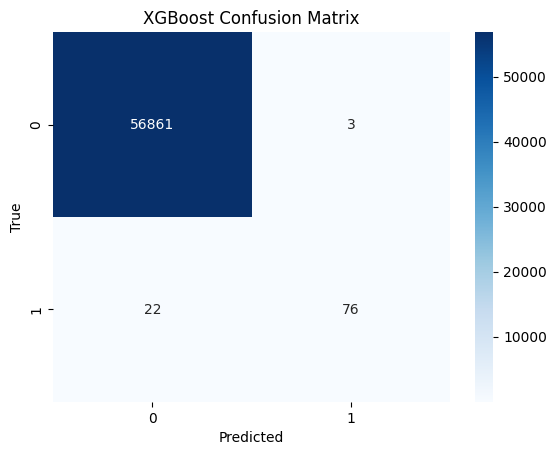

In [140]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

## KNN

#### KNN Implemention 
We selected a range from 1 to the maximum value of k, which is 5, to analyze the accuracy and determine the best value for 'k'.

In [144]:
accuracy_rates = list()
max_k = 8
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_rates.append((k, round(accuracy_score(y_test, y_pred), 4)))
    print('k = ', k, ' accuracy rate is : ', round(accuracy_score(y_test, y_pred), 4) * 100)

k =  1  accuracy rate is :  99.83999999999999
k =  2  accuracy rate is :  99.83999999999999
k =  3  accuracy rate is :  99.85000000000001
k =  4  accuracy rate is :  99.85000000000001
k =  5  accuracy rate is :  99.85000000000001
k =  6  accuracy rate is :  99.85000000000001
k =  7  accuracy rate is :  99.83999999999999


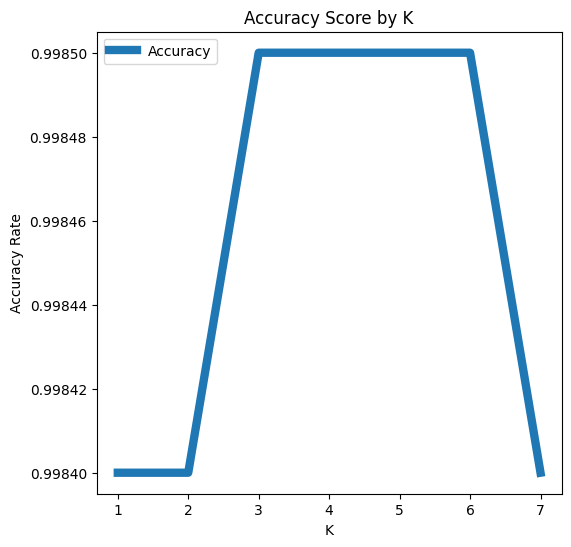

In [145]:
accuracy_results = pd.DataFrame(accuracy_rates, columns=['K', 'Accuracy'])

#Accuracy Plot
ax = accuracy_results.set_index('K').plot(figsize=(6, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Accuracy Rate')
ax.set_xticks(range(1, max_k))
plt.title('Accuracy Score by K')
plt.show()

Fit the Model

In [146]:
knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_clf.fit(X_train, y_train)

train_score = cross_val_score(knn_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9987693333504073


In [147]:
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9985077771145676


In [148]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.23423423423423423
Recall Score: 0.13
Precision Score: 1.00


Confusion Matrix

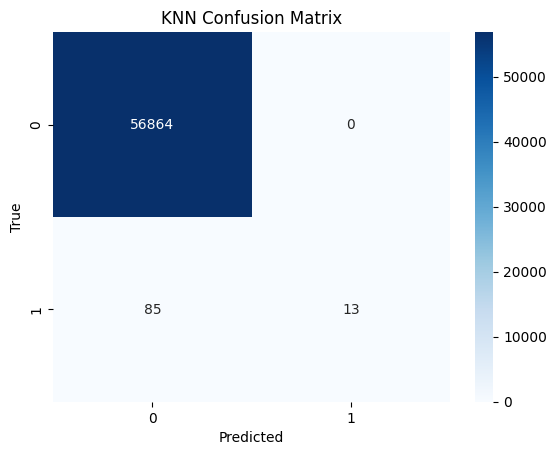

In [149]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN Confusion Matrix")
plt.show()

## RandomForest

#### Normal RandomForest

In [150]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
train_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9995807620735947


In [152]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9995611109160493


In [153]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.8603351955307262
Recall Score: 0.79
Precision Score: 0.95


Confusion Matrix

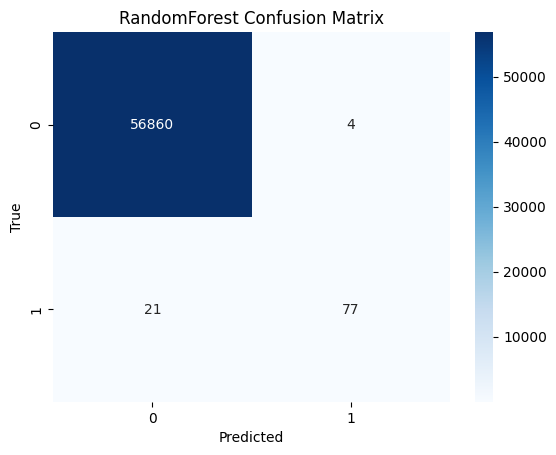

In [154]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()

#### RandomForest Using GridSearch
Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [20, 30],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fit The Model / Train Score

In [ ]:
rf_clf_best = RandomForestClassifier(max_depth=10 , min_samples_split=5 , n_estimators=30 )

rf_clf_best.fit(X_train, y_train)

train_score = cross_val_score(rf_clf_best, X_train, y_train, cv=3)
print(f'Training Score: {train_score.mean()}')

Accuracy Score

In [ ]:
y_pred = rf_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

Confusion Matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()

# Classifier Models (Oversampling Dataset)

## Decision Tree

#### Decision Tree without Pruning

In [183]:
model = DecisionTreeClassifier(random_state=10)

model.fit(X_os_train, y_os_train)

DecisionTreeClassifier(random_state=10)

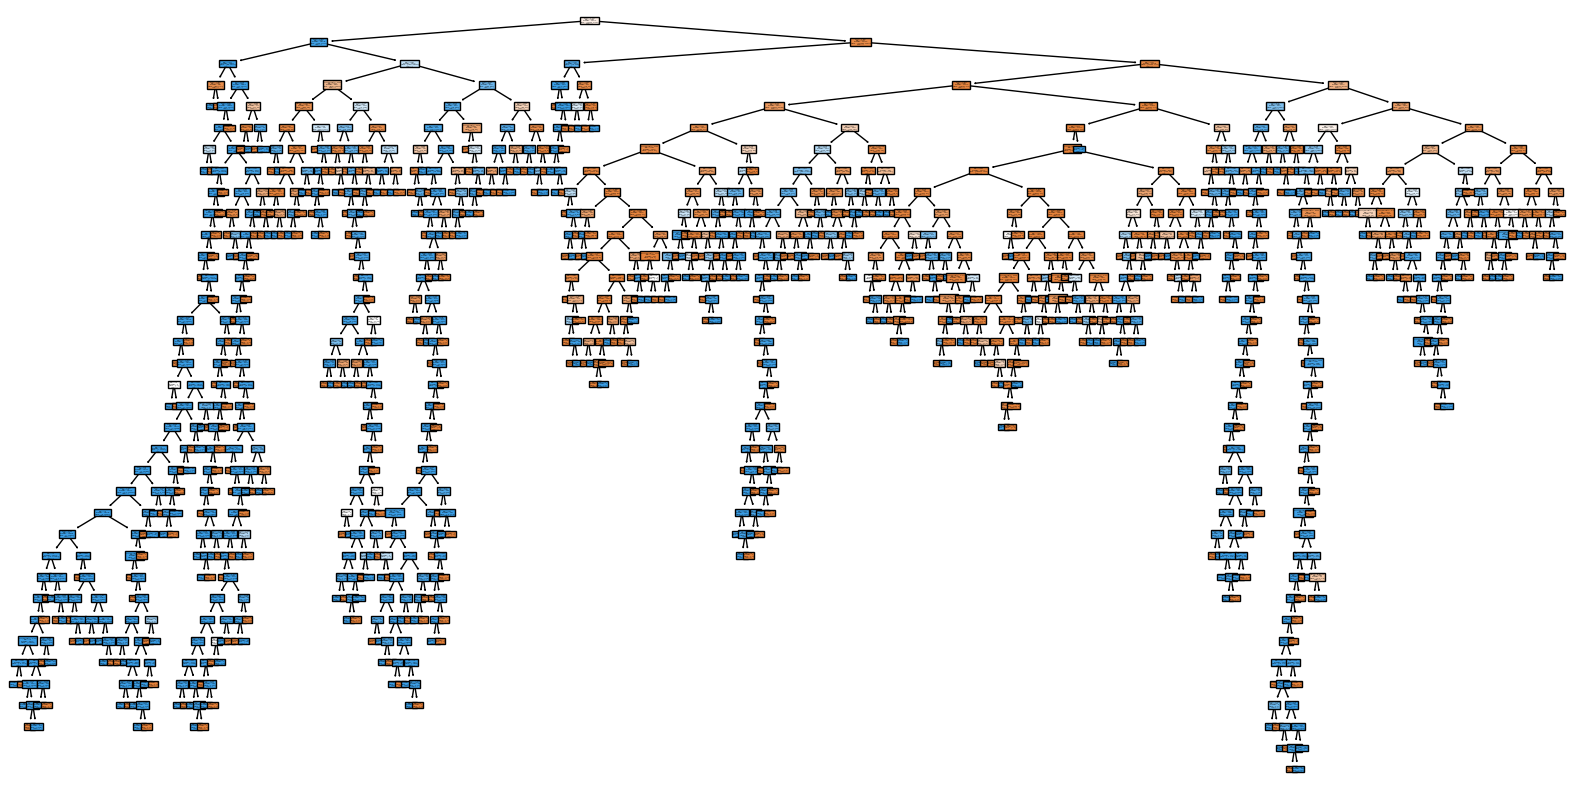

In [184]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_os_train), class_names= list(y_os_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [185]:
train_score = cross_val_score(model, X_os_train, y_os_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9986010981793566
Accuracy: 0.9972613321161476


In [186]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.49019607843137253
Recall Score: 0.77
Precision Score: 0.36


Confusion Matrix

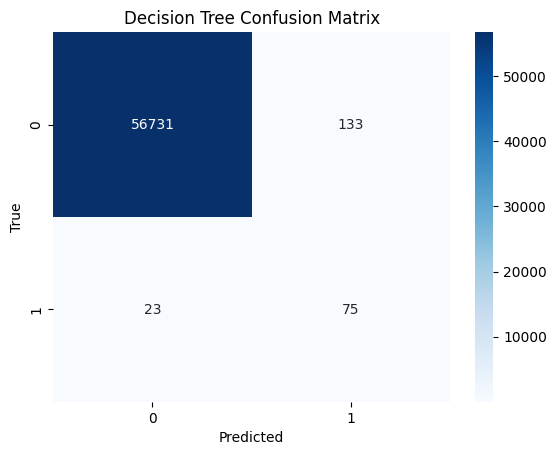

In [187]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### Decision Tree with Pruning
Hyperparameter Tuning using GridSearchCV

In [188]:
# Performing a grid search to find the best hyperparameters using the "GridSearchCV"
parameters = {
    'max_depth': range(1,5),
    'max_features': range(5,12),
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    cv=3,
)
grid_search.fit(X_os_train, y_os_train)
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 11}


Fit Model with pruning

In [189]:
model = DecisionTreeClassifier(max_depth=4,max_features=11, random_state=10, splitter ='best')

model.fit(X_os_train, y_os_train)

DecisionTreeClassifier(max_depth=4, max_features=11, random_state=10)

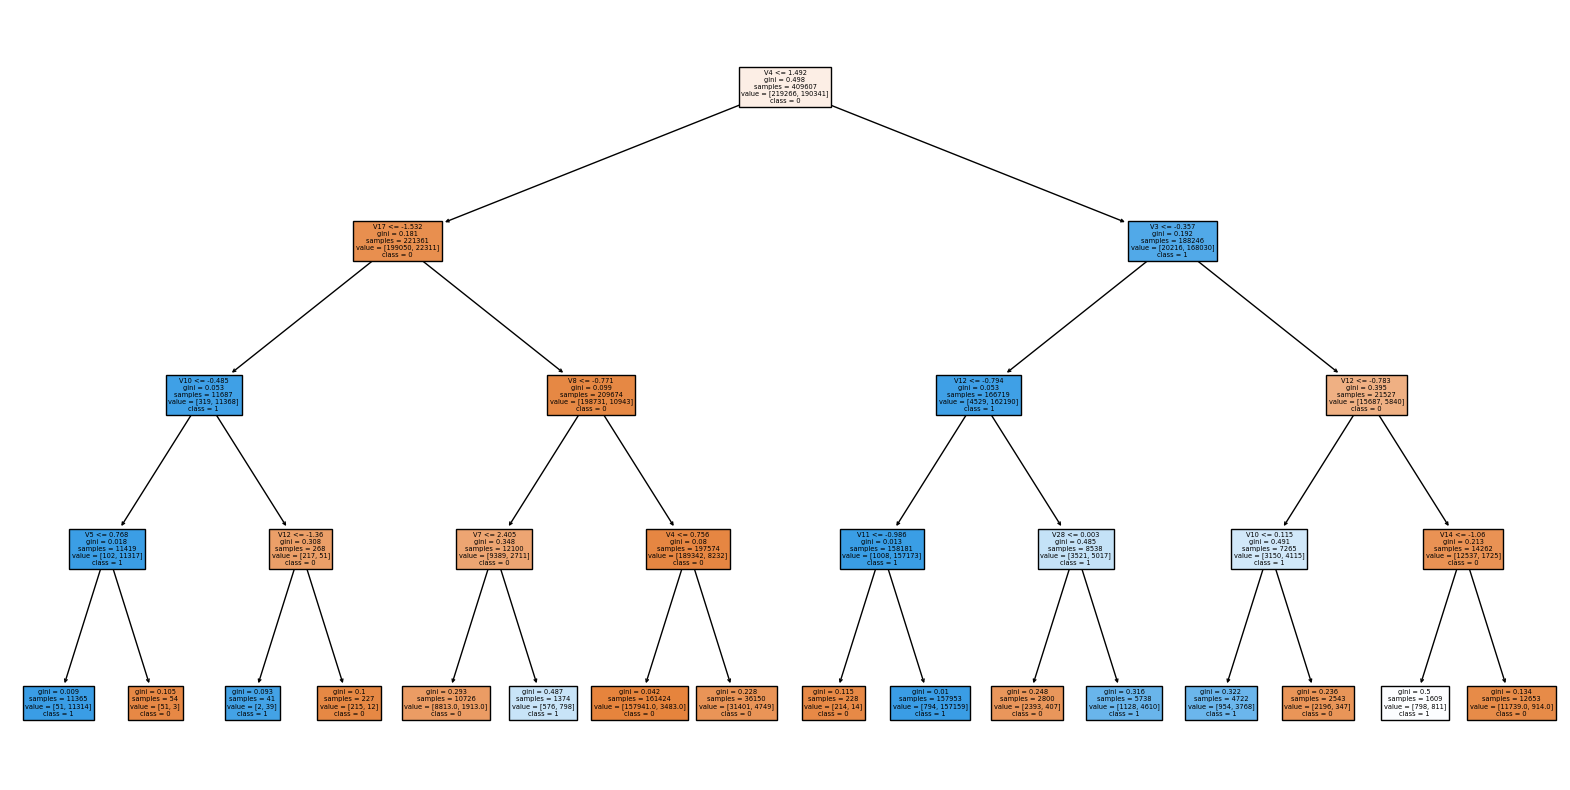

In [190]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_os_train), class_names= list(y_os_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [191]:
train_score = cross_val_score(model, X_os_train, y_os_train, cv=3)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9603546800970152
Accuracy: 0.9753519890453285


In [192]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.11026615969581749
Recall Score: 0.89
Precision Score: 0.06


Confusion Matrix

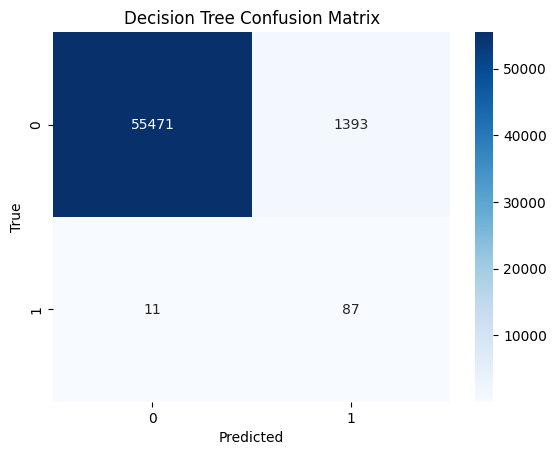

In [193]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## XGBoost

#### Normal XGBoost

In [194]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [195]:
train_score = cross_val_score(xgb_clf, X_os_train, y_os_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9998486355542584
Accuracy: 0.9994733330992591


In [196]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.8469387755102041
Recall Score: 0.85
Precision Score: 0.85


Confusion Matrix

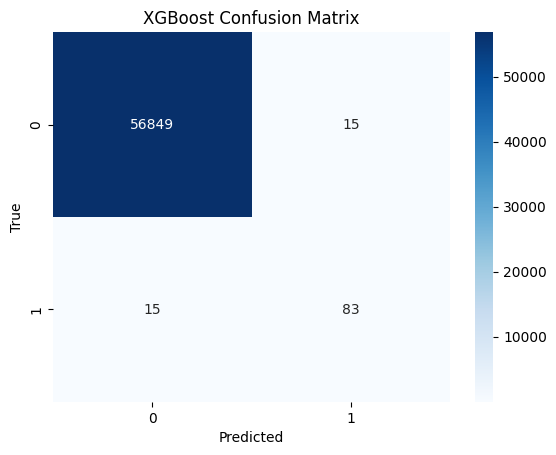

In [197]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

#### XGBoost using GridSearch
Hyperparameter Tuning using GridSearchCV

In [198]:
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(xgb_clf, param_grid=parameters, cv=4)
grid_search.fit(X_os_train, y_os_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


Fit the Model

In [199]:
xgb_clf_best = xgb.XGBClassifier(max_depth=7 , learning_rate=0.1 ,n_estimators=300)

xgb_clf_best.fit(X_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [200]:
train_score = cross_val_score(xgb_clf_best, X_os_train, y_os_train, cv=3)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.99986572499271
Accuracy: 0.9994557775359011


In [201]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.841025641025641
Recall Score: 0.84
Precision Score: 0.85


Confusion Matrix

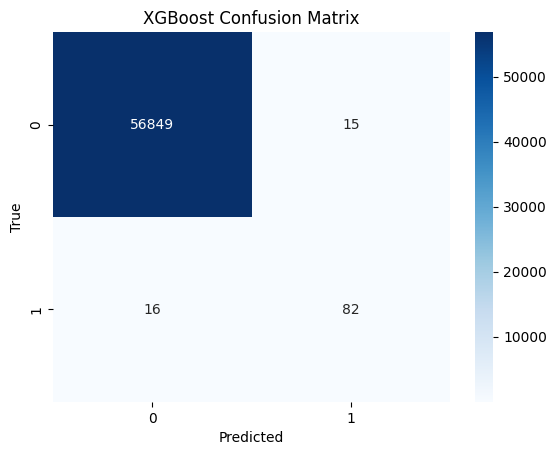

In [202]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

## KNN

#### KNN Implemention 
We selected a range from 1 to the maximum value of k, which is 5, to analyze the accuracy and determine the best value for 'k'.

In [203]:
accuracy_rates = list()
max_k = 6
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_os_train, y_os_train)
    y_pred = knn.predict(X_test)
    accuracy_rates.append((k, round(accuracy_score(y_test, y_pred), 4)))
    print('k = ', k, ' accuracy rate is : ', round(accuracy_score(y_test, y_pred), 4) * 100)

k =  1  accuracy rate is :  98.9
k =  2  accuracy rate is :  98.9
k =  3  accuracy rate is :  98.63
k =  4  accuracy rate is :  98.72999999999999
k =  5  accuracy rate is :  98.5


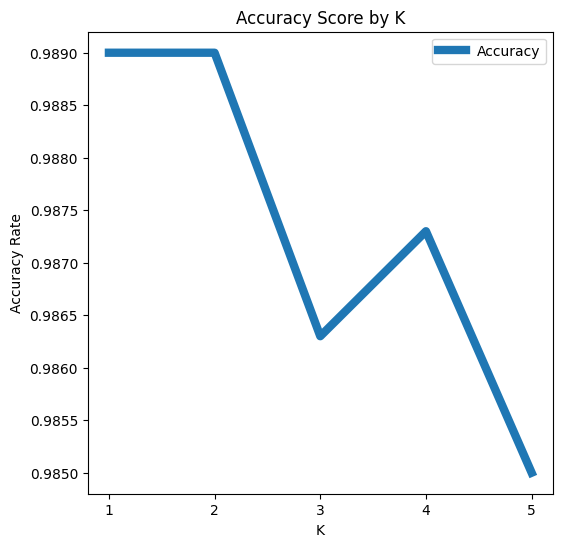

In [204]:
accuracy_results = pd.DataFrame(accuracy_rates, columns=['K', 'Accuracy'])

#Accuracy Plot
ax = accuracy_results.set_index('K').plot(figsize=(6, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Accuracy Rate')
ax.set_xticks(range(1, max_k))
plt.title('Accuracy Score by K')
plt.show()

Fit the Model

In [205]:
knn_clf = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn_clf.fit(X_os_train, y_os_train)

train_score = cross_val_score(knn_clf, X_os_train, y_os_train, cv=3)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9883058638715972


In [206]:
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9889575506478003


In [207]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.1690885072655218
Recall Score: 0.65
Precision Score: 0.10


Confusion Matrix

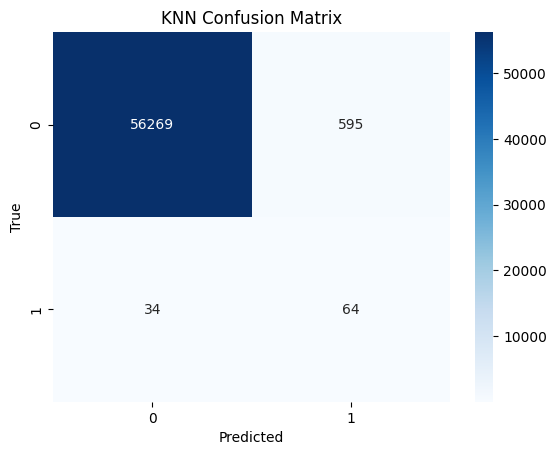

In [208]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN Confusion Matrix")
plt.show()

## RandomForest

#### Normal RandomForest

In [209]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_os_train, y_os_train)

RandomForestClassifier()

In [210]:
train_score = cross_val_score(rf_clf, X_os_train, y_os_train, cv=2)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9998584008931679


In [211]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9994557775359011


In [212]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.841025641025641
Recall Score: 0.84
Precision Score: 0.85


Confusion Matrix

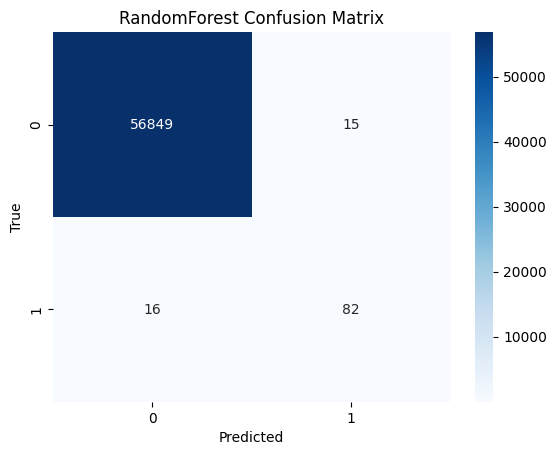

In [213]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()

#### RandomForest Using GridSearch
Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [20, 30],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(X_os_train, y_os_train)
print(grid_search.best_params_)

Fit The Model / Train Score

In [ ]:
rf_clf_best = RandomForestClassifier(max_depth=10 , min_samples_split=5 , n_estimators=30 )

rf_clf_best.fit(X_os_train, y_os_train)

train_score = cross_val_score(rf_clf_best, X_os_train, y_os_train, cv=3)
print(f'Training Score: {train_score.mean()}')

Accuracy Score

In [ ]:
y_pred = rf_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

Confusion Matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()

# Classifier Models (Undersampling Dataset)

## Decision Tree

#### Decision Tree without Pruning

In [231]:
model = DecisionTreeClassifier(random_state=10)

model.fit(X_us_train, y_us_train)

DecisionTreeClassifier(random_state=10)

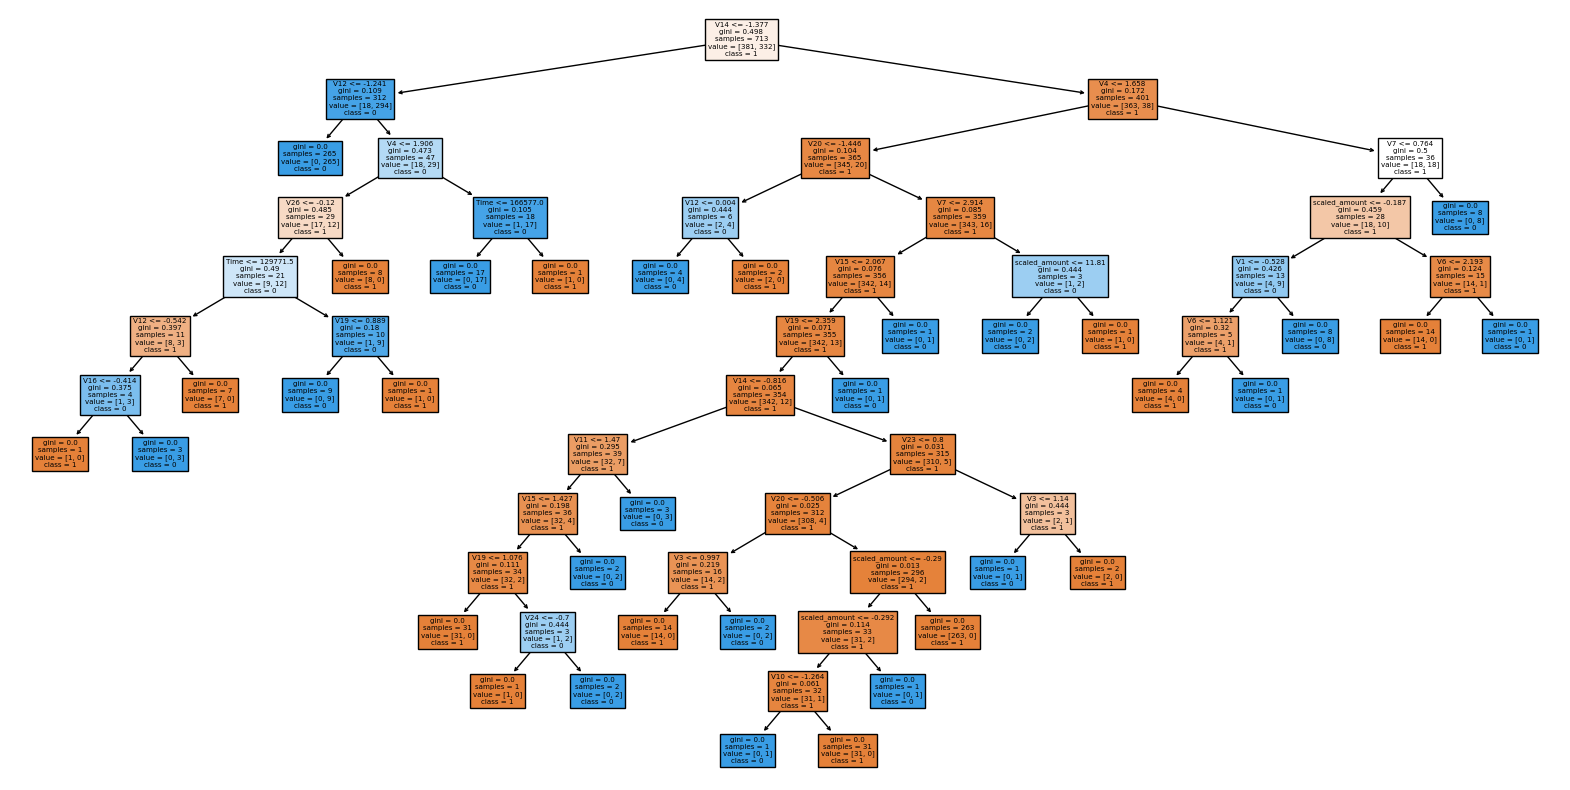

In [232]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_us_train), class_names= list(y_us_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [233]:
train_score = cross_val_score(model, X_us_train, y_us_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9103023736826554
Accuracy: 0.9075348477932657


In [234]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.03375527426160337
Recall Score: 0.94
Precision Score: 0.02


Confusion Matrix

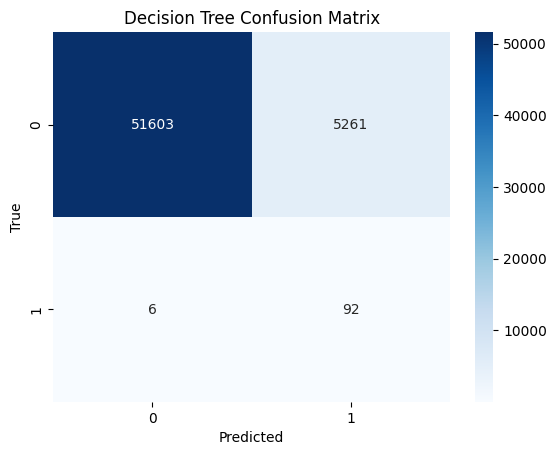

In [235]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### Decision Tree with Pruning
Hyperparameter Tuning using GridSearchCV

In [236]:
# Performing a grid search to find the best hyperparameters using the "GridSearchCV"
parameters = {
    'max_depth': range(1,5),
    'max_features': range(5,12),
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    cv=3,
)
grid_search.fit(X_us_train, y_us_train)
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 10}


Fit Model with pruning

In [239]:
model = DecisionTreeClassifier(max_depth=4,max_features=10, random_state=10, splitter ='best')

model.fit(X_us_train, y_us_train)

DecisionTreeClassifier(max_depth=4, max_features=10, random_state=10)

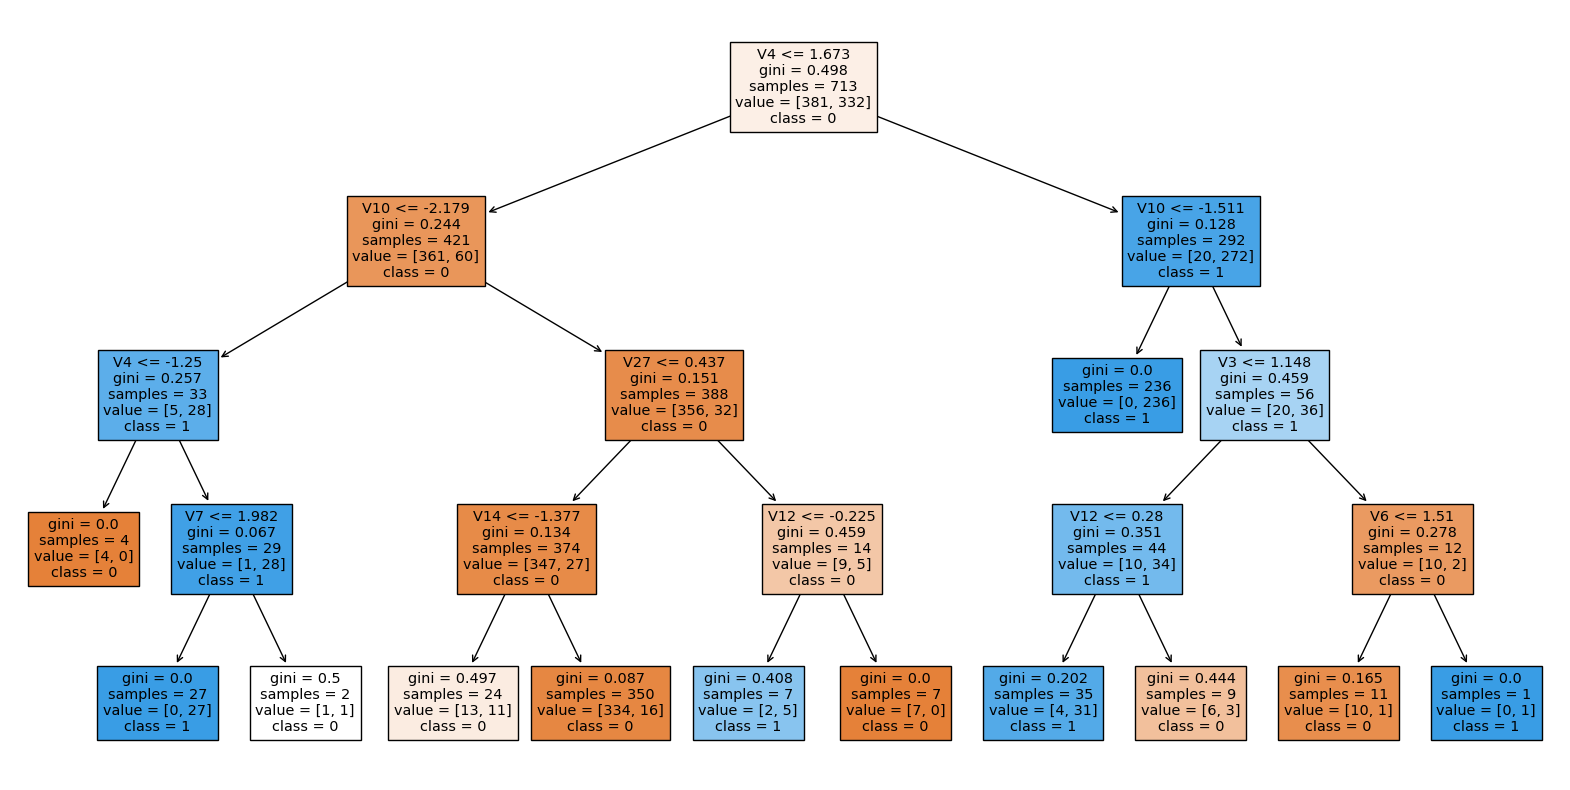

In [240]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X_os_train), class_names= list(y_os_train.unique().astype(str)))
plt.show()

Training Score / Accuracy Score

In [241]:
train_score = cross_val_score(model, X_us_train, y_us_train, cv=3)
print(f'Training Score: {train_score.mean()}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9004183952061836
Accuracy: 0.9478599768266563


In [242]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.056543837357052096
Recall Score: 0.91
Precision Score: 0.03


Confusion Matrix

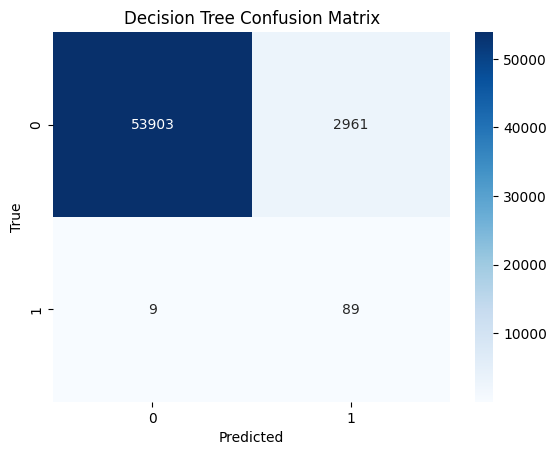

In [243]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## XGBoost

#### Normal XGBoost

In [244]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_us_train,y_us_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [245]:
train_score = cross_val_score(xgb_clf, X_us_train, y_us_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9299320397911947
Accuracy: 0.9468241985885327


In [246]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.05785381026438569
Recall Score: 0.95


Precision Score: 0.03


Confusion Matrix

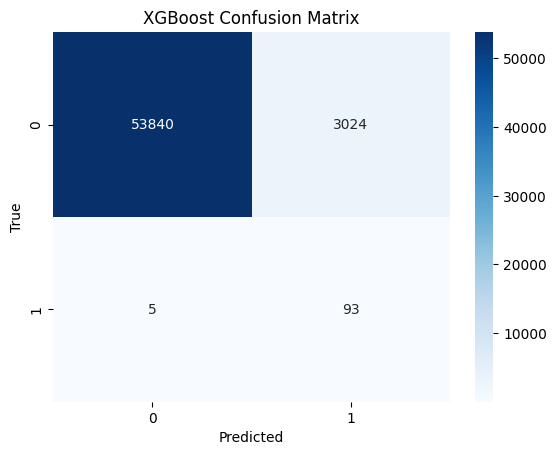

In [247]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

#### XGBoost using GridSearch
Hyperparameter Tuning using GridSearchCV

In [248]:
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
}

# cv parameter specifies the number of folds for cross-validation.
grid_search = GridSearchCV(xgb_clf, param_grid=parameters, cv=4)
grid_search.fit(X_us_train, y_us_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


Fit the Model

In [249]:
xgb_clf_best = xgb.XGBClassifier(max_depth=5 , learning_rate=0.1 ,n_estimators=300)

xgb_clf_best.fit(X_us_train,y_us_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Score / Accuracy Score

In [250]:
train_score = cross_val_score(xgb_clf_best, X_us_train, y_us_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9285137397813454
Accuracy: 0.9475615322495698


In [251]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.05861960289946423
Recall Score: 0.95
Precision Score: 0.03


Confusion Matrix

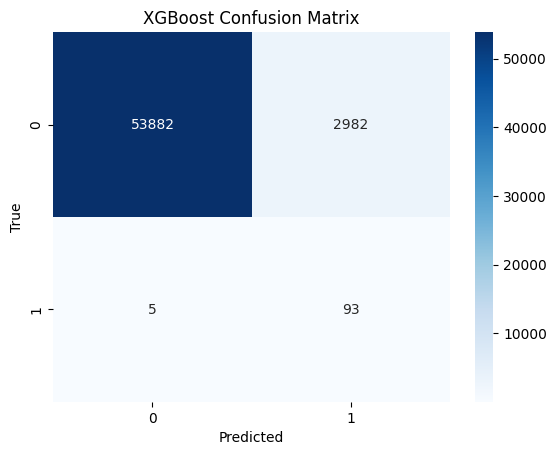

In [252]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

## KNN

#### KNN Implemention 
We selected a range from 1 to the maximum value of k, which is 5, to analyze the accuracy and determine the best value for 'k'.

In [266]:
accuracy_rates = list()
max_k = 20
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_us_train, y_us_train)
    y_pred = knn.predict(X_test)
    accuracy_rates.append((k, round(accuracy_score(y_test, y_pred), 4)))
    print('k = ', k, ' accuracy rate is : ', round(accuracy_score(y_test, y_pred), 4) * 100)

k =  1  accuracy rate is :  63.77
k =  2  accuracy rate is :  63.77
k =  3  accuracy rate is :  63.56
k =  4  accuracy rate is :  64.11
k =  5  accuracy rate is :  64.58
k =  6  accuracy rate is :  65.09
k =  7  accuracy rate is :  65.56
k =  8  accuracy rate is :  65.63
k =  9  accuracy rate is :  65.98
k =  10  accuracy rate is :  66.14
k =  11  accuracy rate is :  66.41
k =  12  accuracy rate is :  66.36
k =  13  accuracy rate is :  66.55
k =  14  accuracy rate is :  66.63
k =  15  accuracy rate is :  66.66
k =  16  accuracy rate is :  66.63
k =  17  accuracy rate is :  66.62
k =  18  accuracy rate is :  66.58
k =  19  accuracy rate is :  66.45


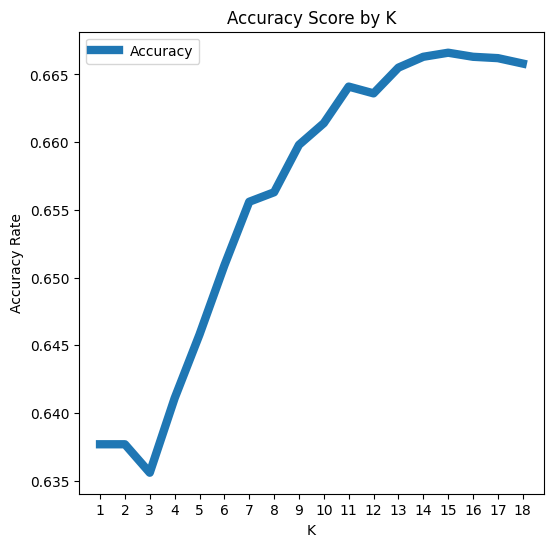

In [257]:
accuracy_results = pd.DataFrame(accuracy_rates, columns=['K', 'Accuracy'])

#Accuracy Plot
ax = accuracy_results.set_index('K').plot(figsize=(6, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Accuracy Rate')
ax.set_xticks(range(1, max_k))
plt.title('Accuracy Score by K')
plt.show()

Fit the Model

In [267]:
knn_clf = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_clf.fit(X_us_train, y_us_train)

train_score = cross_val_score(knn_clf, X_us_train, y_us_train, cv=3)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.6507818317200298


In [268]:
y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6665847407043292


In [269]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.005758559313160926
Recall Score: 0.56
Precision Score: 0.00


Confusion Matrix

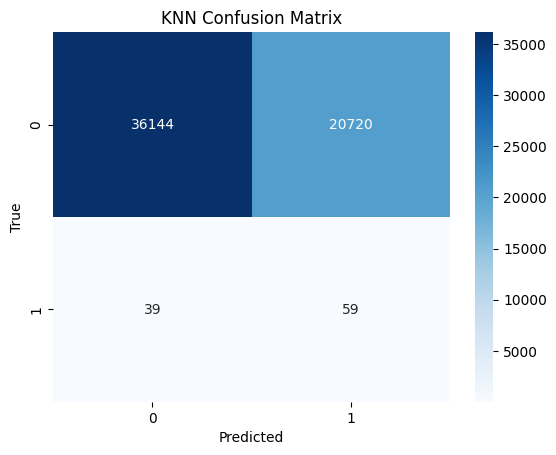

In [265]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN Confusion Matrix")
plt.show()

## RandomForest

#### Normal RandomForest

In [270]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_us_train, y_us_train)

RandomForestClassifier()

In [271]:
train_score = cross_val_score(rf_clf, X_us_train, y_us_train, cv=5)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9257362355953905


In [272]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9737368772163899


In [273]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.10739856801909307
Recall Score: 0.92
Precision Score: 0.06


Confusion Matrix

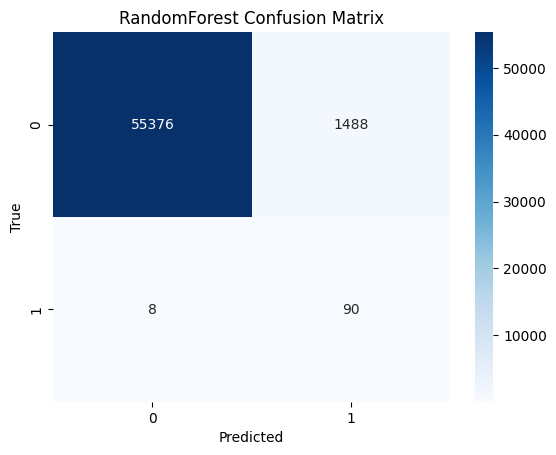

In [274]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()

#### RandomForest Using GridSearch
Hyperparameter Tuning using GridSearchCV

In [277]:
param_grid = {
    'n_estimators': [20, 30],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_us_train, y_us_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 30}


Fit The Model / Train Score

In [278]:
rf_clf_best = RandomForestClassifier(max_depth=20 , min_samples_split=5 , n_estimators=30 )

rf_clf_best.fit(X_us_train, y_us_train)

train_score = cross_val_score(rf_clf_best, X_us_train, y_us_train, cv=3)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9312898155042607


Accuracy Score

In [279]:
y_pred = rf_clf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9705242091218708


In [280]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.09682625067240452
Recall Score: 0.92
Precision Score: 0.05


Confusion Matrix

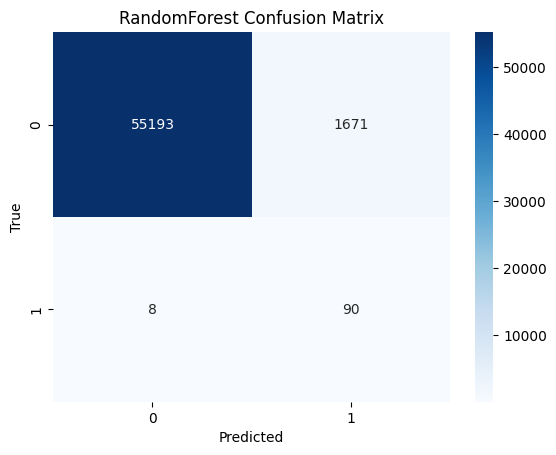

In [281]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("RandomForest Confusion Matrix")
plt.show()